In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [3]:
with open('../data/features_list.bin', 'rb') as f:
    features_list = pickle.load(f)
    f.close()

In [4]:
scaler = StandardScaler()

In [5]:
scaled_features_list = []
for features in features_list:
    scaled_features_list.append(scaler.fit_transform(features))

In [6]:
np.random.seed(32)

In [7]:
features_scaled_list = []
kmeans_list = []
for idx in range(4):
    features_scaled = pd.DataFrame(data=scaled_features_list[idx],
                                   index=features_list[idx].index,
                                   columns=features_list[idx].columns)
    kmeans = KMeans(n_clusters=3, random_state=143)
    kmeans.fit(features_scaled)
    features_scaled['LABEL'] = kmeans.labels_
    features_scaled_list.append(features_scaled)
    kmeans_list.append(kmeans)

In [8]:
def cluster_centers_visualize(idx):
    fig, ax = plt.subplots(3, 1, figsize=(12,6), sharex=True, sharey=True)
    ax = ax.ravel()
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)
    plt.title('INIT')
    for i in range(kmeans_list[idx].n_clusters):
        ax[i].set_title(f'Cluster {i}')
        sns.barplot(np.arange(features_list[idx].columns.size), kmeans_list[idx].cluster_centers_[i], ax=ax[i])
        ax[i].set_xticks(np.arange(features_list[idx].columns.size))
        ax[i].set_xticklabels(features_list[idx].columns, rotation=90)

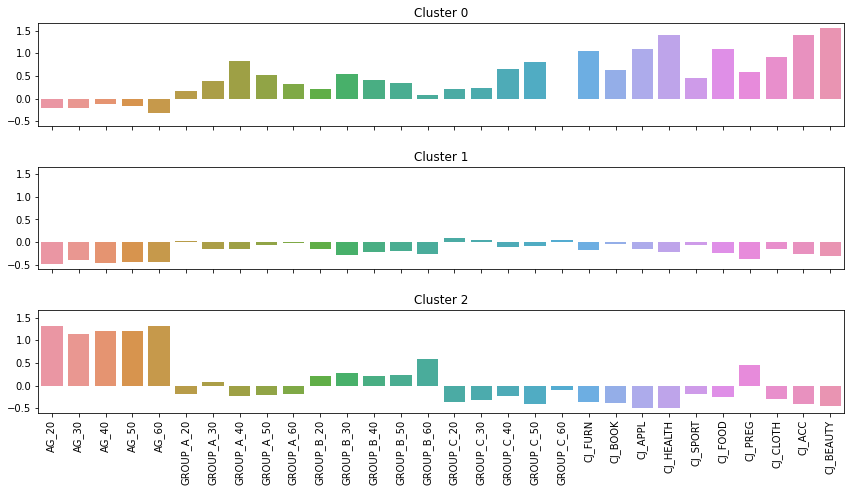

In [9]:
cluster_centers_visualize(0)

In [10]:
features_scaled_list[0]['LABEL'].value_counts()

1    39
2    16
0    12
Name: LABEL, dtype: int64

In [11]:
#각 군집에 따른 변수의 평균값
features_scaled_list[0].groupby('LABEL').mean()

,AG_20,AG_30,AG_40,AG_50,AG_60,GROUP_A_20,GROUP_A_30,GROUP_A_40,GROUP_A_50,GROUP_A_60,...,CJ_FURN,CJ_BOOK,CJ_APPL,CJ_HEALTH,CJ_SPORT,CJ_FOOD,CJ_PREG,CJ_CLOTH,CJ_ACC,CJ_BEAUTY
LABEL,,,,,,,,,,,,,,,,,,,,,
0,-0.214169,-0.204052,-0.111976,-0.172494,-0.323917,0.175702,0.399729,0.823332,0.527974,0.315764,...,1.057526,0.627089,1.106623,1.398126,0.447430,1.093904,0.580846,0.912218,1.398208,1.565218
1,-0.473081,-0.405025,-0.459779,-0.438355,-0.437899,0.021036,-0.153047,-0.160303,-0.073144,-0.019158,...,-0.178109,-0.032250,-0.141404,-0.227985,-0.063701,-0.235787,-0.364199,-0.156069,-0.263138,-0.297890
2,1.313761,1.140287,1.204694,1.197861,1.310317,-0.183050,0.073255,-0.226760,-0.217691,-0.190127,...,-0.359004,-0.391707,-0.485295,-0.492880,-0.180302,-0.245698,0.452100,-0.303746,-0.407256,-0.447807


In [12]:
print('1군집:', ', '.join(features_scaled_list[0].query('LABEL == 0').index.tolist()), '\n' )
print('2군집:', ', '.join(features_scaled_list[0].query('LABEL == 1').index.tolist()), '\n' )
print('3군집:', ', '.join(features_scaled_list[0].query('LABEL == 2').index.tolist()), '\n' )

1군집: 고산2동, 남산1동, 만촌2동, 만촌3동, 범어3동, 범어4동, 상계10동, 상계9동, 수성1가동, 신당5동, 신당동, 황학동 

2군집: 공릉1동, 공릉2동, 광희동, 남산2동, 대봉1동, 대신동, 동인동, 두산동, 만촌1동, 명동, 범물1동, 범어1동, 범어2동, 삼덕동, 상계1동, 상계6.7동, 상동, 성내1동, 성내2동, 성내3동, 소공동, 수성2.3가동, 수성4가동, 월계1동, 월계2동, 월계3동, 을지로동, 장충동, 중계1동, 중계2.3동, 중계4동, 중림동, 청구동, 파동, 필동, 하계1동, 하계2동, 황금1동, 회현동 

3군집: 고산1동, 고산3동, 남산4동, 다산동, 동화동, 범물2동, 상계2동, 상계3.4동, 상계5동, 상계8동, 약수동, 중계본동, 중동, 지산1동, 지산2동, 황금2동 



In [72]:
df = pd.DataFrame(features_scaled_list[3])
df.to_csv('clustered_04.csv')

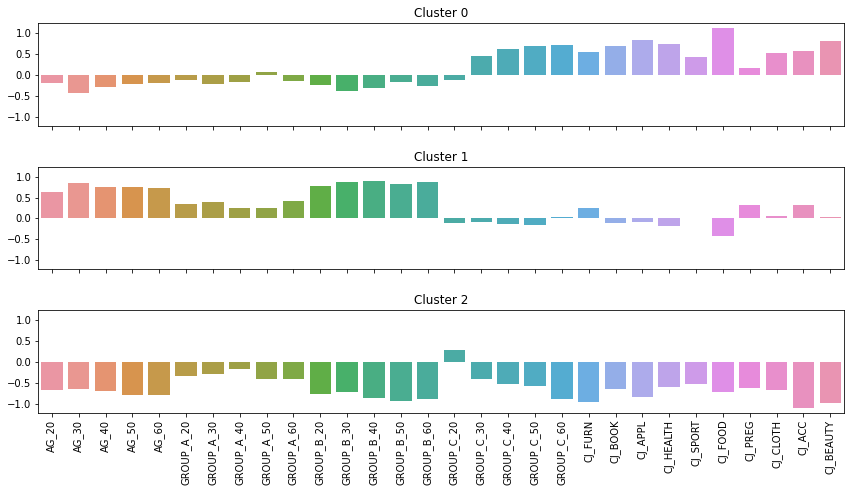

In [13]:
cluster_centers_visualize(1)

In [14]:
features_scaled_list[1]['LABEL'].value_counts()

1    26
0    22
2    19
Name: LABEL, dtype: int64

In [15]:
#각 군집에 따른 변수의 평균값
features_scaled_list[1].groupby('LABEL').mean()

,AG_20,AG_30,AG_40,AG_50,AG_60,GROUP_A_20,GROUP_A_30,GROUP_A_40,GROUP_A_50,GROUP_A_60,...,CJ_FURN,CJ_BOOK,CJ_APPL,CJ_HEALTH,CJ_SPORT,CJ_FOOD,CJ_PREG,CJ_CLOTH,CJ_ACC,CJ_BEAUTY
LABEL,,,,,,,,,,,,,,,,,,,,,
0,-0.186147,-0.434957,-0.277503,-0.207619,-0.189878,-0.126066,-0.224567,-0.157723,0.066297,-0.139143,...,0.551407,0.691614,0.838982,0.745766,0.42984,1.128459,0.170957,0.517848,0.566889,0.815045
1,0.643586,0.842687,0.752016,0.748035,0.739458,0.354241,0.402427,0.256504,0.238372,0.420226,...,0.240446,-0.118109,-0.096040,-0.188628,0.01694,-0.431155,0.314574,0.053340,0.325897,0.033638
2,-0.665158,-0.649516,-0.707755,-0.783226,-0.792031,-0.338780,-0.290665,-0.168379,-0.402959,-0.413933,...,-0.967503,-0.639193,-0.840029,-0.605396,-0.52089,-0.716635,-0.628420,-0.672605,-1.102362,-0.989767


In [16]:
print('1군집:', ', '.join(features_scaled_list[1].query('LABEL == 0').index.tolist()), '\n' )
print('2군집:', ', '.join(features_scaled_list[1].query('LABEL == 1').index.tolist()), '\n' )
print('3군집:', ', '.join(features_scaled_list[1].query('LABEL == 2').index.tolist()), '\n' )

1군집: 고산1동, 고산2동, 고산3동, 남산4동, 대봉1동, 만촌1동, 만촌2동, 만촌3동, 범물1동, 범어1동, 범어2동, 범어3동, 범어4동, 수성1가동, 수성2.3가동, 수성4가동, 신당5동, 중계1동, 중동, 지산1동, 파동, 황금1동 

2군집: 공릉1동, 공릉2동, 다산동, 동화동, 범물2동, 상계10동, 상계1동, 상계2동, 상계3.4동, 상계5동, 상계6.7동, 상계8동, 상계9동, 신당동, 약수동, 월계1동, 월계2동, 월계3동, 중계4동, 중계본동, 중림동, 지산2동, 청구동, 하계2동, 황금2동, 황학동 

3군집: 광희동, 남산1동, 남산2동, 대신동, 동인동, 두산동, 명동, 삼덕동, 상동, 성내1동, 성내2동, 성내3동, 소공동, 을지로동, 장충동, 중계2.3동, 필동, 하계1동, 회현동 



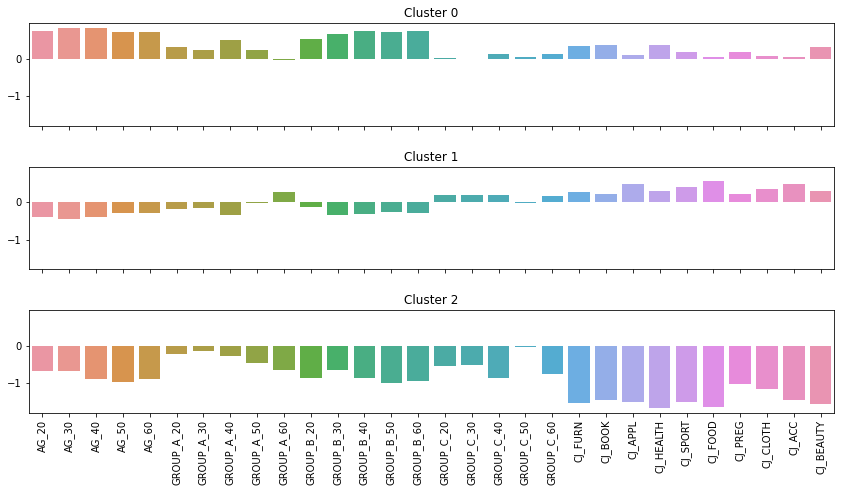

In [17]:
cluster_centers_visualize(2)

In [18]:
features_scaled_list[2]['LABEL'].value_counts()

1    30
0    26
2    11
Name: LABEL, dtype: int64

In [19]:
#각 군집에 따른 변수의 평균값
features_scaled_list[2].groupby('LABEL').mean()

,AG_20,AG_30,AG_40,AG_50,AG_60,GROUP_A_20,GROUP_A_30,GROUP_A_40,GROUP_A_50,GROUP_A_60,...,CJ_FURN,CJ_BOOK,CJ_APPL,CJ_HEALTH,CJ_SPORT,CJ_FOOD,CJ_PREG,CJ_CLOTH,CJ_ACC,CJ_BEAUTY
LABEL,,,,,,,,,,,,,,,,,,,,,
0,0.727475,0.807427,0.821777,0.723073,0.699774,0.313029,0.239477,0.509899,0.225339,-0.035833,...,0.347528,0.351963,0.088277,0.368473,0.178175,0.039703,0.180884,0.074252,0.049972,0.302365
1,-0.381569,-0.449464,-0.386266,-0.275610,-0.283438,-0.190724,-0.150769,-0.337043,-0.021869,0.268353,...,0.259928,0.220452,0.477160,0.286916,0.395490,0.558317,0.219015,0.360561,0.489799,0.305530
2,-0.678842,-0.682652,-0.888929,-0.957420,-0.881000,-0.219731,-0.154848,-0.286007,-0.472976,-0.647176,...,-1.530325,-1.433145,-1.510000,-1.653434,-1.499750,-1.616526,-1.024859,-1.158853,-1.453931,-1.547945


In [20]:
print('1군집:', ', '.join(features_scaled_list[2].query('LABEL == 0').index.tolist()), '\n' )
print('2군집:', ', '.join(features_scaled_list[2].query('LABEL == 1').index.tolist()), '\n' )
print('3군집:', ', '.join(features_scaled_list[2].query('LABEL == 2').index.tolist()), '\n' )

1군집: 고산1동, 고산3동, 공릉1동, 공릉2동, 남산4동, 다산동, 동화동, 범물2동, 상계10동, 상계1동, 상계2동, 상계3.4동, 상계5동, 상계6.7동, 상계8동, 상계9동, 월계1동, 월계2동, 월계3동, 중계1동, 중계4동, 중계본동, 중동, 청구동, 하계2동, 황학동 

2군집: 고산2동, 남산1동, 남산2동, 대봉1동, 대신동, 두산동, 만촌1동, 만촌2동, 만촌3동, 범물1동, 범어1동, 범어2동, 범어3동, 범어4동, 상동, 성내3동, 수성1가동, 수성2.3가동, 수성4가동, 신당5동, 신당동, 약수동, 중계2.3동, 중림동, 지산1동, 지산2동, 파동, 하계1동, 황금1동, 황금2동 

3군집: 광희동, 동인동, 명동, 삼덕동, 성내1동, 성내2동, 소공동, 을지로동, 장충동, 필동, 회현동 



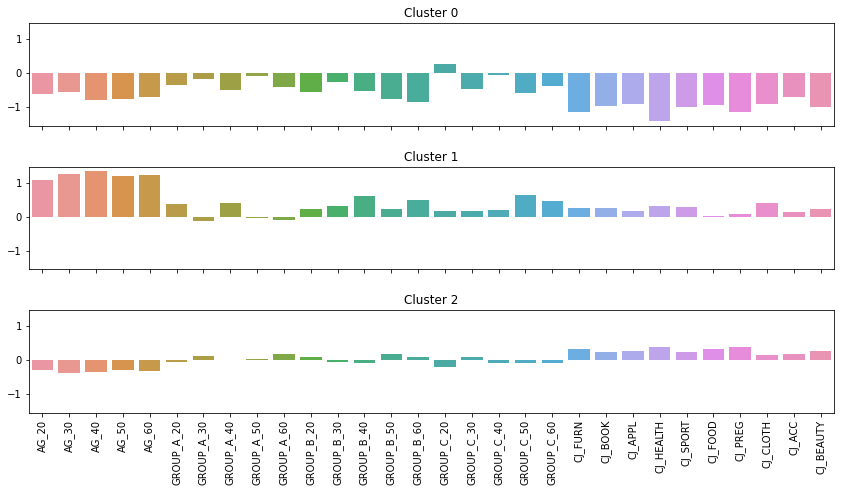

In [21]:
cluster_centers_visualize(3)

In [22]:
features_scaled_list[3]['LABEL'].value_counts()

2    36
1    17
0    14
Name: LABEL, dtype: int64

In [23]:
#각 군집에 따른 변수의 평균값
features_scaled_list[3].groupby('LABEL').mean()

,AG_20,AG_30,AG_40,AG_50,AG_60,GROUP_A_20,GROUP_A_30,GROUP_A_40,GROUP_A_50,GROUP_A_60,...,CJ_FURN,CJ_BOOK,CJ_APPL,CJ_HEALTH,CJ_SPORT,CJ_FOOD,CJ_PREG,CJ_CLOTH,CJ_ACC,CJ_BEAUTY
LABEL,,,,,,,,,,,,,,,,,,,,,
0,-0.612011,-0.549768,-0.784642,-0.758095,-0.682392,-0.351218,-0.164003,-0.486203,-0.079603,-0.410725,...,-1.134478,-0.947605,-0.907427,-1.397626,-0.981373,-0.932769,-1.126885,-0.887872,-0.692543,-0.982920
1,1.091939,1.269779,1.341261,1.194346,1.219170,0.374537,-0.108841,0.403595,-0.043991,-0.081744,...,0.256915,0.272015,0.171606,0.333105,0.277726,0.032590,0.098881,0.417151,0.153921,0.232050
2,-0.277634,-0.385819,-0.328235,-0.269182,-0.310345,-0.040280,0.115176,-0.001507,0.051730,0.198328,...,0.319865,0.240062,0.271852,0.386222,0.250497,0.347354,0.391539,0.148296,0.196637,0.272667


In [24]:
print('1군집:', ', '.join(features_scaled_list[3].query('LABEL == 0').index.tolist()), '\n' )
print('2군집:', ', '.join(features_scaled_list[3].query('LABEL == 1').index.tolist()), '\n' )
print('3군집:', ', '.join(features_scaled_list[3].query('LABEL == 2').index.tolist()), '\n' )

1군집: 광희동, 남산2동, 동인동, 동화동, 명동, 삼덕동, 성내1동, 성내2동, 소공동, 을지로동, 장충동, 파동, 필동, 회현동 

2군집: 공릉1동, 남산4동, 대봉1동, 범어4동, 상계1동, 상계3.4동, 상계5동, 상계6.7동, 상계8동, 상계9동, 월계2동, 월계3동, 중계1동, 중계2.3동, 중계4동, 중계본동, 중동 

3군집: 고산1동, 고산2동, 고산3동, 공릉2동, 남산1동, 다산동, 대신동, 두산동, 만촌1동, 만촌2동, 만촌3동, 범물1동, 범물2동, 범어1동, 범어2동, 범어3동, 상계10동, 상계2동, 상동, 성내3동, 수성1가동, 수성2.3가동, 수성4가동, 신당5동, 신당동, 약수동, 월계1동, 중림동, 지산1동, 지산2동, 청구동, 하계1동, 하계2동, 황금1동, 황금2동, 황학동 



# 분류문제 정확도, 정밀도, 재현율 확인

In [25]:
X = pd.concat([features_scaled_list[1].iloc[:, :-1], pd.get_dummies(features_scaled_list[0]['LABEL'])], axis=1)
y = features_scaled_list[1].iloc[:, -1]

In [26]:
X = features_scaled_list[1].iloc[:, :-1]
y = features_scaled_list[1].iloc[:, -1]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)

In [28]:
dt_clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=124)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=124, splitter='best')

In [29]:
dt_pred = dt_clf.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred, average='weighted')
recall = recall_score(y_test, dt_pred, average='weighted')
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

정확도: 0.7619, 정밀도: 0.7643, 재현율: 0.7619


In [31]:
cv_score = cross_val_score(dt_clf, X_train, y_train, scoring='accuracy', cv=5)

In [32]:
round(np.mean(cv_score), 4)

0.8467

In [33]:
confusion_matrix(y_test, dt_pred)

array([[6, 1, 0],
       [1, 6, 1],
       [1, 1, 4]])

In [34]:
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=2)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
rf_pred = rf_clf.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, average='weighted')
recall = recall_score(y_test, rf_pred, average='weighted')
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

정확도: 0.7619, 정밀도: 0.7670, 재현율: 0.7619


In [37]:
confusion_matrix(y_test, rf_pred)

array([[4, 2, 1],
       [0, 7, 1],
       [1, 0, 5]])

In [38]:
svm_clf = LinearSVC(C=1, loss='hinge')
svm_clf.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [39]:
svm_pred = svm_clf.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred, average='weighted')
recall = recall_score(y_test, svm_pred, average='weighted')
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

정확도: 0.9524, 정밀도: 0.9592, 재현율: 0.9524


In [41]:
confusion_matrix(y_test, svm_pred)

array([[7, 0, 0],
       [0, 7, 1],
       [0, 0, 6]])

In [42]:
poly_svm_clf = SVC(C=1, coef0=1, kernel='poly', degree=3)

In [43]:
poly_svm_clf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
poly_pred = poly_svm_clf.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, poly_pred)
precision = precision_score(y_test, poly_pred, average='weighted')
recall = recall_score(y_test, poly_pred, average='weighted')
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

정확도: 0.9048, 정밀도: 0.9169, 재현율: 0.9048


In [46]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
lr_pred = lr_clf.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, lr_pred)
precision = precision_score(y_test, lr_pred, average='weighted')
recall = recall_score(y_test, lr_pred, average='weighted')
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

정확도: 0.9524, 정밀도: 0.9592, 재현율: 0.9524


In [49]:
co

NameError: name 'co' is not defined

In [ ]:
co = pd.read_csv('../data/covid-data.csv')

In [ ]:
a = co.query('location == "South Korea"')

In [ ]:
a = a.set_index('date')

In [ ]:
a = a['new_cases']

In [ ]:
a.plot(figsize = (20,10))
plt.show()

In [ ]:
co.query('location == "South Korea"')